In [ ]:
!pip install catboost
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier

In [65]:


import pandas as pd
df_train=pd.read_csv(r"Train_60\Train_60\Train_60\X_Train_Data_Input.csv")
df_train.dropna(how = 'all')
df_target=pd.read_csv(r"Train_60\Train_60\Train_60\Y_Train_Data_Target.csv")
x_testt=pd.read_csv(r"Test_20\Test_20\Test_20\X_Test_Data_Input.csv")
y_testt=pd.read_csv(r"Test_20\Test_20\Test_20\Y_Test_Data_Target.csv")


In [2]:
C:\Users\tiruv\Downloads\Resume sort\ss.ipynb

In [66]:


df_train = df_train.drop(columns=['ID','Column9','Column5','Column10','Column11','Column13','Column14','Column15','Column16','Column20','Column21'])
x_testt = x_testt.drop(columns=['ID','Column9','Column5','Column10','Column11','Column13','Column14','Column15','Column16','Column20','Column21'])

df_train.head()

,Column0,Column1,Column2,Column3,Column4,Column6,Column7,Column8,Column12,Column17,Column18,Column19
0,2.0,2495,3726.0,0.678139,0.701403,0.434190,-0.015603,0.606265,0,0,0.0,0
1,0.0,2495,3454.0,0.452580,0.701403,1.554998,-0.015574,0.329946,0,0,0.0,0
2,2.0,2495,4543.0,-1.577453,-1.429540,-0.407939,-0.015607,-0.774979,1,0,0.0,0
3,0.0,211,59.0,NaN,NaN,-0.407939,-0.015607,-0.774979,0,0,1.0,0
4,0.0,718,950.0,-2.028572,-1.855728,-0.407939,-0.015607,-0.774979,0,0,0.0,0


In [67]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#for train preprocessing

# Create DataFrame
train = df_train[:]
# Imputation of missing values using IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)
df_imputed = pd.DataFrame(imputer.fit_transform(train.select_dtypes(include=['float64', 'int64'])), columns=train.select_dtypes(include=['float64', 'int64']).columns)

# Combine the non-numeric columns back
train[train.select_dtypes(exclude=['float64', 'int64']).columns] = train.select_dtypes(exclude=['float64', 'int64'])

print('done encoder')
# Feature and target split (assume 'Column1' is the target for classification)
X = train # Features
y = df_target['target']  # Target



#for test preprocessing

test = x_testt[:]
# Imputation of missing values using IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)
df_imputed = pd.DataFrame(imputer.fit_transform(test.select_dtypes(include=['float64', 'int64'])), columns=test.select_dtypes(include=['float64', 'int64']).columns)

# Combine the non-numeric columns back
test[test.select_dtypes(exclude=['float64', 'int64']).columns] = test.select_dtypes(exclude=['float64', 'int64'])

print('done encoder')
X_test = test
y_test = y_testt['target']  # Target


done encoder
done encoder


In [68]:
# Step 6: Interpolation of missing values (linear method) to ensure smooth continuity
X = X.interpolate(method='linear', limit_direction='forward', axis=0)
X_test = X_test.interpolate(method='linear', limit_direction='forward', axis=0)



In [69]:

X_train,y_train=X,y

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [70]:
# Step 8: Model training using CatBoostClassifier
# CatBoost is selected as the primary model for training
catboost_model = CatBoostClassifier(verbose=0)  
catboost_model.fit(X_train_scaled, y_train)

In [71]:
# Step 9: Model prediction and evaluation
# Predict labels for the test data
y_pred = catboost_model.predict(X_test_scaled)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'CatBoost Model Accuracy: {accuracy * 100:.2f}%')



CatBoost Model Accuracy: 97.80%


In [72]:
import joblib
joblib.dump(catboost_model, 'catboost_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [73]:
# Import necessary libraries for evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, log_loss, balanced_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'y_test' is the true labels and 'y_pred' is the predicted labels by the model

# Step 1: Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 97.80%


In [74]:

# Step 2: Precision
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted for multiclass, change to 'binary' for binary classification
print(f'Precision: {precision:.4f}')


Precision: 0.9794


In [75]:

# Step 3: Recall (Sensitivity or True Positive Rate)
recall = recall_score(y_test, y_pred, average='weighted')  # Change to 'binary' for binary classification
print(f'Recall: {recall:.4f}')


Recall: 0.9780


In [76]:

# Step 4: F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')  # Change to 'binary' for binary classification
print(f'F1 Score: {f1:.4f}')


F1 Score: 0.9785


In [77]:

# Step 5: AUC-ROC (Area Under the Curve - Receiver Operating Characteristic)
# For AUC-ROC, you need predicted probabilities instead of predicted labels
y_pred_prob = catboost_model.predict_proba(X_test_scaled)[:, 1]  # For binary classification, adjust for multiclass
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class="ovr")  # One-vs-Rest (ovr) for multiclass
print(f'AUC-ROC: {roc_auc:.4f}')


AUC-ROC: 0.9946


In [78]:

# Step 6: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[232881   4153]
 [  1601  23077]]


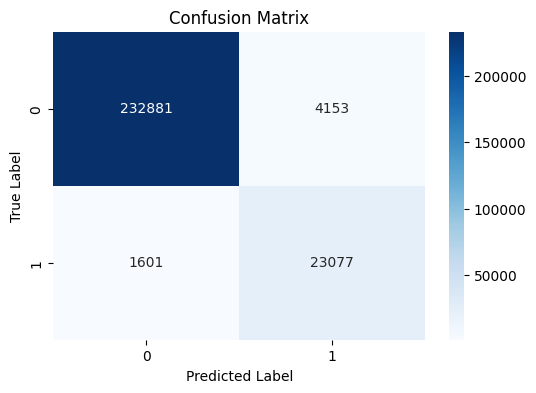

In [79]:

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [80]:


# Step 7: Log Loss
logloss = log_loss(y_test, y_pred_prob)
print(f'Log Loss: {logloss:.4f}')


Log Loss: 0.0505


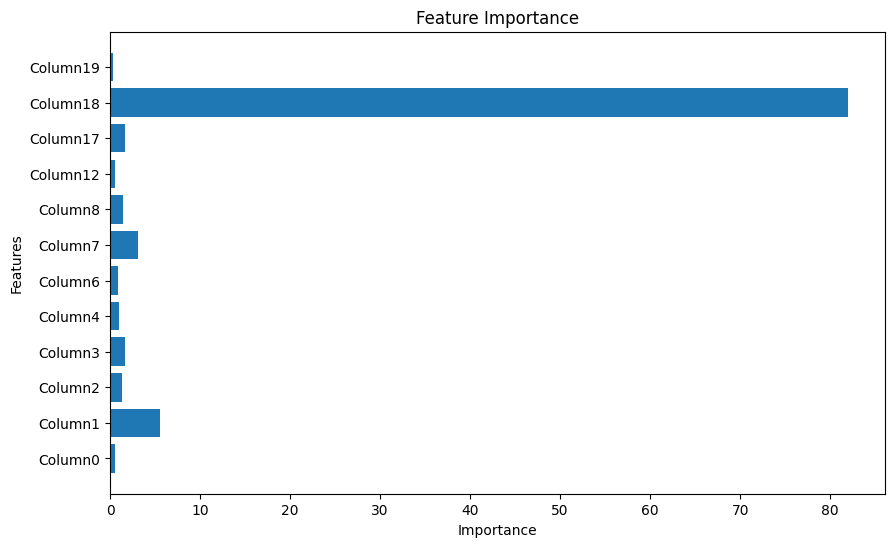

Total Misclassifications: 5754
Misclassifications by True Label:
True_Label
0    4153
1    1601
dtype: int64
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.94      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.96      0.94    261712
weighted avg       0.98      0.98      0.98    261712



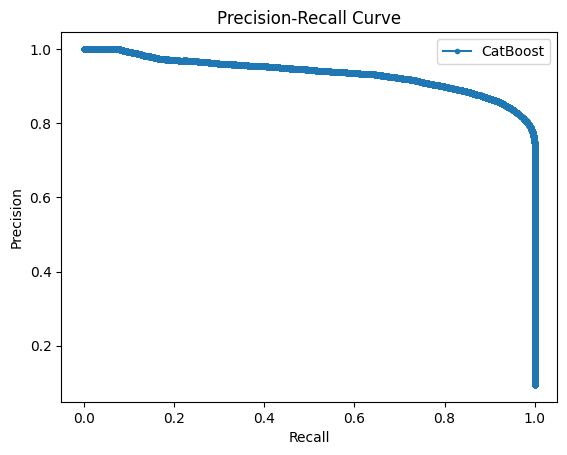

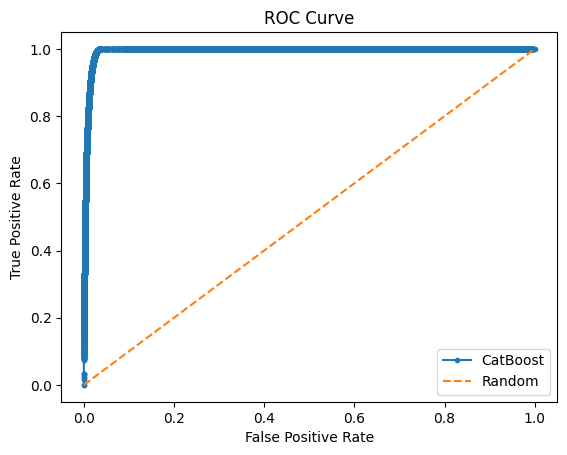

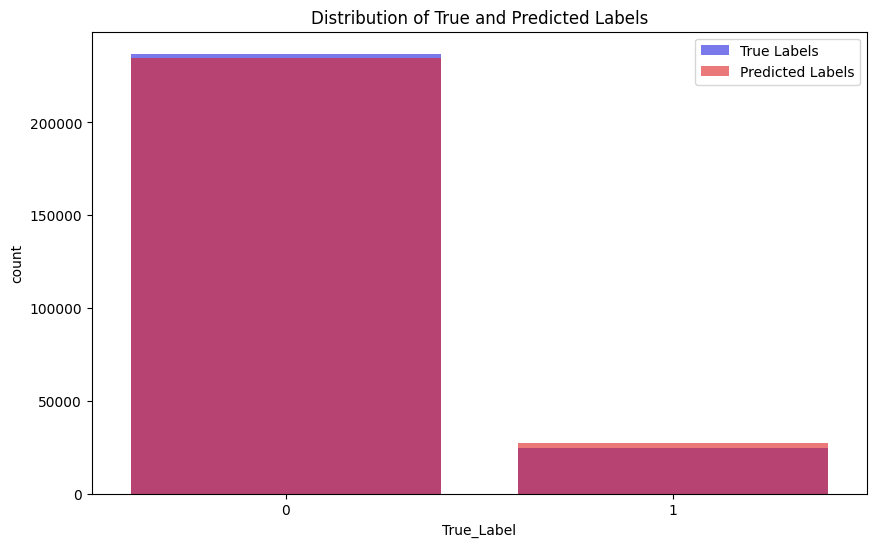

In [81]:
# Import necessary libraries for analysis and visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve

# Step 1: Feature Importance (CatBoost specific)
# CatBoost provides an easy way to visualize feature importance
importances = catboost_model.get_feature_importance()
features = df_train.columns

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Insights: This plot shows which features had the largest impact on the model’s predictions. Features with higher values contribute more to the model’s decisions.

# Step 2: Misclassification Analysis
# Create a DataFrame to compare true vs predicted values
misclassified = pd.DataFrame({'True_Label': y_test, 'Predicted_Label': y_pred})
misclassified['Is_Misclassified'] = misclassified['True_Label'] != misclassified['Predicted_Label']

# Count the number of misclassifications
misclassification_count = misclassified['Is_Misclassified'].sum()
print(f'Total Misclassifications: {misclassification_count}')

# Analyze misclassifications
misclass_by_class = misclassified[misclassified['Is_Misclassified']].groupby('True_Label').size()
print("Misclassifications by True Label:")
print(misclass_by_class)

# Insights: This analysis helps in understanding where the model is making mistakes and which classes are more likely to be misclassified.

# Step 3: Performance by Class
# Detailed classification report
report = classification_report(y_test, y_pred, target_names=[str(i) for i in sorted(y_test.unique())])
print("Classification Report:\n", report)

# Insights: The classification report provides detailed precision, recall, and F1 score for each class. Classes with low precision/recall should be inspected further.

# Step 4: Precision-Recall Curve
y_pred_prob = catboost_model.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class (for binary)

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision, marker='.', label='CatBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Insights: This curve shows the trade-off between precision and recall. If precision is high but recall is low, the model is conservative and misses positive cases.

# Step 5: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, marker='.', label='CatBoost')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Insights: The ROC curve illustrates the model’s ability to distinguish between classes. A curve closer to the top-left corner indicates better performance.

# Step 6: Further Analysis - Class Distribution
# Visualizing the distribution of true vs predicted labels
plt.figure(figsize=(10, 6))
sns.countplot(x='True_Label', data=misclassified, label='True Labels', alpha=0.6, color='blue')
sns.countplot(x='Predicted_Label', data=misclassified, label='Predicted Labels', alpha=0.6, color='red')
plt.title('Distribution of True and Predicted Labels')
plt.legend()
plt.show()

# Insights: This chart helps to visualize if there are any imbalances between the true labels and the predicted labels. It highlights any biases or skews in the predictions.

# Step 7: Summary of Insights
# After performing the above analysis, you can summarize the key findings:
# - Which features are the most important?
# - Which classes are most prone to misclassification?
# - Does the model favor precision over recall or vice versa?
# - How well does the model separate positive from negative classes, based on the ROC curve?
